In [2]:
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import json
import pandas as pd

In [2]:
%pwd

'/home/jyuwei/code/WordEmbedding-SubCulture/src'

            mae_e     mae_p     mae_a
epsilon                              
0.01     0.721666  0.752657  0.752997
0.05     0.719983  0.752942  0.751678
0.10     0.717738  0.753379  0.752319
0.20     0.719394  0.751701  0.746983
0.50     0.717016  0.750331  0.745239


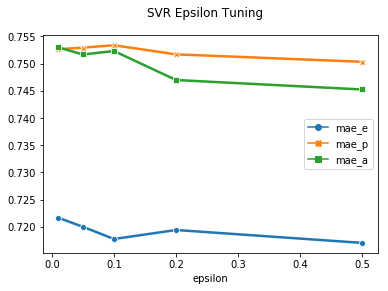

In [13]:
def plot_svr():
    with open('../result/epa_expansion/svr/result_grid_search_seed_8500_eval_1000_epa_1.0', 'r') as fp:
        data = json.load(fp)
    result = []
    for item in data:
        result.append([
            item['epsilon'],
            item['metrics'][0][0],
            item['metrics'][0][1],
            item['metrics'][0][2]
        ])
    df = pd.DataFrame(data=result, columns=['epsilon', 'mae_e', 'mae_p', 'mae_a']).set_index('epsilon')
    print(df)
    plt.suptitle('SVR Epsilon Tuning')
    sns.lineplot(data=df, linewidth=2.5, dashes=False, markers=True)
plot_svr()

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


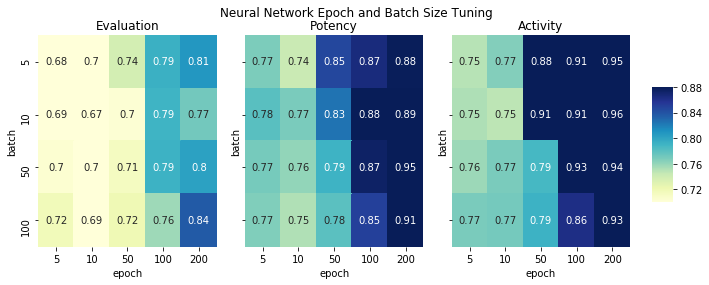

In [5]:
def plot_nn():
    with open('../result/epa_expansion/nn/result_grid_search_seed_8500_eval_1000_epa_1.0', 'r') as fp:
        data = json.load(fp)
    result = []
    for item in data:
        mae = item['mae'][0]
        result.append([
            item['epoch'],
            item['batch'],
            mae[0],
            mae[1],
            mae[2]
        ])
    df = pd.DataFrame(data=result, columns=['epoch', 'batch', 'mae_e', 'mae_p', 'mae_a'])
    title_list = ['Evaluation', 'Potency', 'Activity']
    heatmap_list = [df.pivot('batch', 'epoch', 'mae_e'), df.pivot('batch', 'epoch', 'mae_p'), df.pivot('batch', 'epoch', 'mae_a')]
    
    fig, axn = plt.subplots(1, 3, sharex=True, sharey=True)
    fig.set_size_inches(10, 4)
    fig.suptitle('Neural Network Epoch and Batch Size Tuning')
    cbar_ax = fig.add_axes([.91, .3, .03, .4])
    for i, ax in enumerate(axn.flat):
        sns.heatmap(heatmap_list[i], cmap="YlGnBu", ax=ax, vmin=0.7, vmax=0.88, cbar=i == 0, cbar_ax=None if i else cbar_ax, annot=True)
        ax.set_title(title_list[i])
    fig.tight_layout(rect=[0, 0, 0.9, 1])
    fig.subplots_adjust(top=0.88)
plot_nn()

    enn  sigma     mae_e     mae_p     mae_a
0   0.4    0.5  0.853729  0.844745  0.910077
1   0.4    1.0  0.853318  0.844636  0.910027
2   0.4    2.0  0.852489  0.844534  0.909982
3   0.5    0.5  0.763704  0.755298  0.798519
4   0.5    1.0  0.762854  0.755563  0.797759
5   0.5    2.0  0.761252  0.756179  0.796321
6   0.6    0.5  0.767160  0.719760  0.781335
7   0.6    1.0  0.765831  0.719331  0.780342
8   0.6    2.0  0.762925  0.718486  0.778210
9   0.7    0.5  0.848240  0.747849  0.828742
10  0.7    1.0  0.846937  0.747103  0.827812
11  0.7    2.0  0.844064  0.745482  0.825738
12  0.8    0.5  0.925286  0.796877  0.871030
13  0.8    1.0  0.924124  0.796144  0.870408
14  0.8    2.0  0.921548  0.794536  0.869001


/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


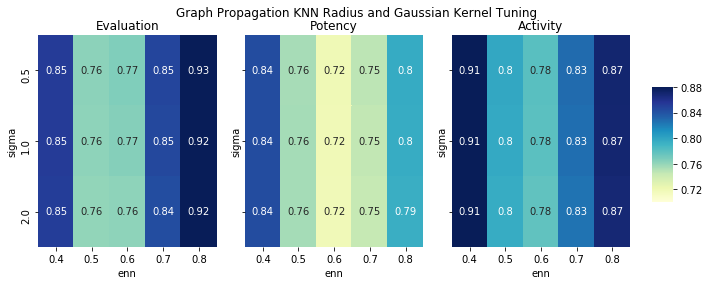

In [6]:
def plot_graph(attr):
    with open('../result/epa_expansion/graph/result_grid_search_seed_8500_eval_1000_epa_1.0', 'r') as fp:
        data = json.load(fp)
    result = []
    for item in data:
        mae = item['metrics'][attr]
        result.append([
            item['enn'],
            item['exp'],
            mae[0],
            mae[1],
            mae[2]
        ])
    df = pd.DataFrame(data=result, columns=['enn', 'sigma', 'mae_e', 'mae_p', 'mae_a'])
    print(df)
    title_list = ['Evaluation', 'Potency', 'Activity']
    heatmap_list = [df.pivot('sigma', 'enn', 'mae_e'), df.pivot('sigma', 'enn', 'mae_p'), df.pivot('sigma', 'enn', 'mae_a')]
    
    fig, axn = plt.subplots(1, 3, sharex=True, sharey=True)
    fig.set_size_inches(10, 4)
    fig.suptitle('Graph Propagation KNN Radius and Gaussian Kernel Tuning')
    cbar_ax = fig.add_axes([.91, .3, .03, .4])
    for i, ax in enumerate(axn.flat):
        sns.heatmap(heatmap_list[i], cmap="YlGnBu", ax=ax, vmin=0.7, vmax=0.88, cbar=i == 0, cbar_ax=None if i else cbar_ax, annot=True)
        ax.set_title(title_list[i])
    fig.tight_layout(rect=[0, 0, 0.9, 1])
    fig.subplots_adjust(top=0.88)
plot_graph('mae')

              mae_e     mae_p     mae_a
iteration                              
10         0.762338  0.708059  0.802859
30         0.764662  0.716190  0.782817
50         0.765831  0.719331  0.780342
100        0.766772  0.721674  0.779899
200        0.766956  0.722139  0.779862


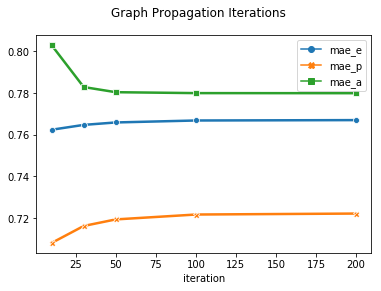

In [42]:
def plot_graph_it():
    with open('../result/epa_expansion/graph/result_iteration_seed_8500_eval_1000_epa_1.0', 'r') as fp:
        data = json.load(fp)
    result = []
    for item in data:
        mae = item['metrics']['mae']
        result.append([
            item['it'],
            mae[0],
            mae[1],
            mae[2]
        ])
    df = pd.DataFrame(data=result, columns=['iteration', 'mae_e', 'mae_p', 'mae_a']).set_index('iteration')
    print(df)
    plt.suptitle('Graph Propagation Iterations')
    sns.lineplot(data=df, linewidth=2.5, dashes=False, markers=True)
plot_graph_it()

          mae_e     mae_p     mae_a
alpha                              
0.2    0.909159  0.792832  0.884038
0.5    0.831523  0.744021  0.818067
0.8    0.786438  0.726206  0.790608
1.0    0.765831  0.719331  0.780342


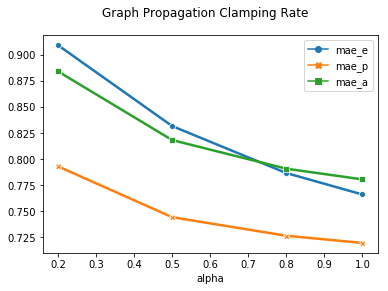

In [3]:
def plot_graph_alpha():
    with open('../result/epa_expansion/graph/result_alpha_seed_8500_eval_1000_epa_1.0', 'r') as fp:
        data = json.load(fp)
    result = []
    for item in data:
        mae = item['metrics']['mae']
        result.append([
            item['alpha'],
            mae[0],
            mae[1],
            mae[2]
        ])
    df = pd.DataFrame(data=result, columns=['alpha', 'mae_e', 'mae_p', 'mae_a']).set_index('alpha')
    print(df)
    plt.suptitle('Graph Propagation Clamping Rate')
    sns.lineplot(data=df, linewidth=2.5, dashes=False, markers=True)
plot_graph_alpha()

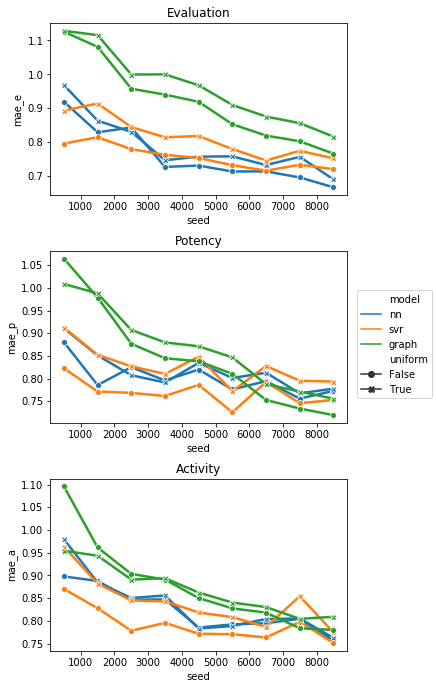

In [7]:
def plot_seed():
    result = []
    for model in ['nn', 'svr', 'graph']:
        with open('../result/epa_expansion/%s/result_seed_uni' % model, 'r') as fp:
            data = json.load(fp)
        for item in data:
            if model == 'graph':
                uni = item['uni']
                mae = item['metrics']['mae']
            else:
                uni = item['uniform']
                if uni:
                    mae = item['mae'][2]
                else:
                    mae = item['mae'][0]
            result.append([
                model,
                item['seed'],
                uni,
                mae[0],
                mae[1],
                mae[2]
            ])
    df = pd.DataFrame(data=result, columns=['model', 'seed', 'uniform', 'mae_e', 'mae_p', 'mae_a'])
    
    title_list = ['Evaluation', 'Potency', 'Activity']
    y_list = ['mae_e', 'mae_p', 'mae_a']
    
    fig, axn = plt.subplots(3, 1)
    fig.set_size_inches(6, 10)
    
    for i, ax in enumerate(axn.flat):
        # sns.heatmap(heatmap_list[i], cmap="YlGnBu", ax=ax, vmin=0.7, vmax=0.88, cbar=i == 0, cbar_ax=None if i else cbar_ax, annot=True)
        sns.lineplot(data=df, x='seed', y=y_list[i], hue='model', style='uniform', linewidth=2.5, dashes=False, markers=True, ax=ax)
        ax.set_title(title_list[i])
        handles, labels = ax.get_legend_handles_labels()
        ax.legend_.remove()
    fig.legend(handles=handles, labels=labels, loc='center right')
    fig.tight_layout(rect=[0, 0, 0.83, 1])
    fig.subplots_adjust(top=0.93)
    
plot_seed()

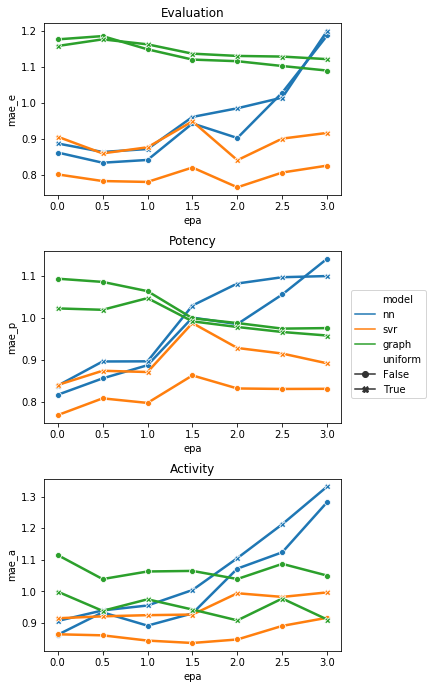

In [8]:
def plot_epa():
    result = []
    for model in ['nn', 'svr', 'graph']:
        with open('../result/epa_expansion/%s/result_epa_uni' % model, 'r') as fp:
            data = json.load(fp)
        for item in data:
            if model == 'graph':
                uni = item['uniform']
                mae = item['mae']['mae']
            else:
                uni = item['uniform']
                if uni:
                    mae = item['mae'][2]
                else:
                    mae = item['mae'][0]
            result.append([
                model,
                item['epa'],
                uni,
                mae[0],
                mae[1],
                mae[2]
            ])
    df = pd.DataFrame(data=result, columns=['model', 'epa', 'uniform', 'mae_e', 'mae_p', 'mae_a'])
    
    title_list = ['Evaluation', 'Potency', 'Activity']
    y_list = ['mae_e', 'mae_p', 'mae_a']
    
    fig, axn = plt.subplots(3, 1)
    fig.set_size_inches(6, 10)
    
    for i, ax in enumerate(axn.flat):
        # sns.heatmap(heatmap_list[i], cmap="YlGnBu", ax=ax, vmin=0.7, vmax=0.88, cbar=i == 0, cbar_ax=None if i else cbar_ax, annot=True)
        sns.lineplot(data=df, x='epa', y=y_list[i], hue='model', style='uniform', linewidth=2.5, dashes=False, markers=True, ax=ax)
        ax.set_title(title_list[i])
        handles, labels = ax.get_legend_handles_labels()
        ax.legend_.remove()
    fig.legend(handles=handles, labels=labels, loc='center right')
    fig.tight_layout(rect=[0, 0, 0.83, 1])
    fig.subplots_adjust(top=0.93)
    
plot_epa()